Project 2, figure replication

Article Link 
https://www.mdpi.com/2218-1989/12/9/866


Part 1 <- reading in the data and formatting in such a way for easy subsetting

In [1]:
# Loading in the data.
# Importing packages for data analysis. 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.cm as cm




In [2]:
# Loading in the Relevant data for analyis

# Metadata, for color coding the PCA plots
metadata =  pd.read_excel('Supplementary Material_1.xlsx', sheet_name ="Variables", index_col = 0)

# Signal Matrix for PCA
signal_matrix = pd.read_excel('Supplementary Material_1.xlsx', sheet_name = 'Signal', index_col = 0)

In [3]:
signal_matrix.head()
# Sanity Check

,Var_001,Var_002,Var_003,Var_004,Var_005,Var_006,Var_007,Var_008,Var_009,Var_010,...,Var_273,Var_274,Var_275,Var_276,Var_277,Var_278,Var_279,Var_280,Var_281,Var_282
Sample.ID,,,,,,,,,,,,,,,,,,,,,
Control,3.743703e+06,124938.293443,34342.771479,3.237222e+06,2.276154e+06,1.839204e+06,34907.607230,89996.944201,16844.085970,226153.196142,...,39349.094639,6.411240e+06,8.243266e+06,3.076412e+06,2.455682e+06,468789.312115,949536.203293,3.570646e+06,4.383112e+06,2.158539e+06
Control,4.545332e+06,162651.056409,40449.353857,3.890073e+06,2.257932e+06,3.007269e+06,33246.503553,127398.013042,13204.654585,271822.452273,...,29369.195038,6.363726e+06,5.798586e+06,2.158112e+06,1.785545e+06,352497.817013,690960.075104,2.488717e+06,3.200070e+06,1.619211e+06
Control,3.142453e+06,103221.231656,29182.411423,2.627076e+06,1.540911e+06,2.041866e+06,25659.926526,98065.682695,11812.441165,235509.960999,...,33187.685432,5.945556e+06,5.600473e+06,2.195959e+06,1.721911e+06,306371.714952,717631.631767,2.254739e+06,2.695617e+06,1.367343e+06
Control,3.773138e+06,104932.822063,34026.158212,2.841866e+06,1.662993e+06,2.293310e+06,31054.234981,101527.723095,11785.194302,183577.128797,...,69340.069989,6.789466e+06,7.698741e+06,3.039581e+06,2.313398e+06,455964.333446,997880.883644,3.242283e+06,4.038372e+06,2.141077e+06
Control,3.685081e+06,174503.307487,29162.548885,2.856276e+06,2.873556e+06,2.286710e+06,26944.366367,97810.560016,15314.622647,194008.132361,...,48330.138407,6.126495e+06,7.161421e+06,2.801062e+06,2.673250e+06,466810.036712,991277.194366,3.351846e+06,4.238467e+06,1.897259e+06


Target Replication 1 <- Figure 2B


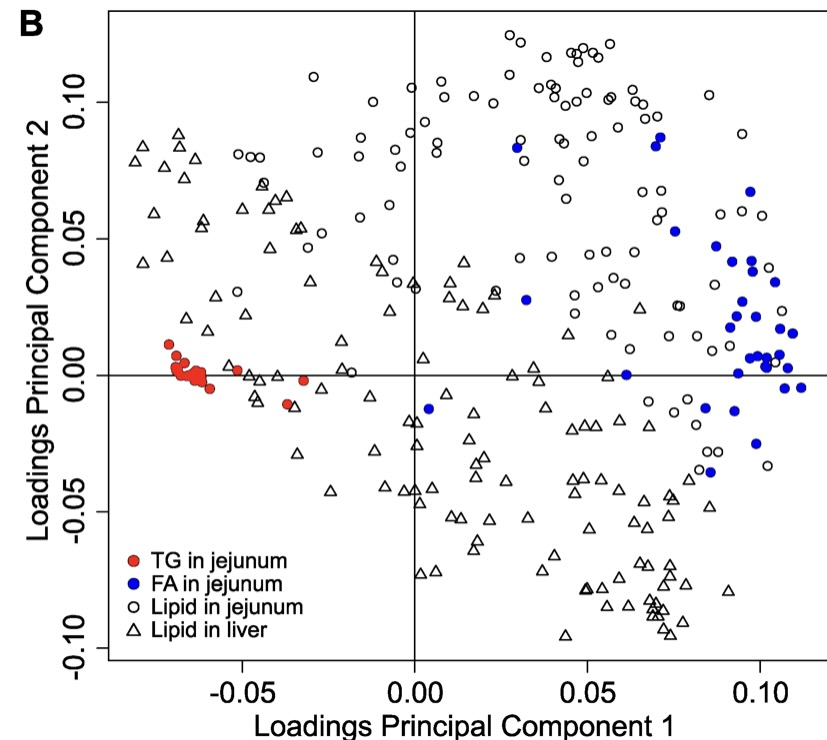

In [4]:
# Choosing to replicate figure 2B, this is a PCA loadings plots of the entire lipidome

# Transposing the matrix for PCA analysis.
signal_matrix_t = signal_matrix.T

In [5]:
signal_matrix_t.head() # Sanity check

Sample.ID,Control,Control,Control,Control,Control,Control,i.V. 6h,i.V. 6h,i.V. 6h,i.V. 6h,...,i.V. 168h,i.V. dd 72h,i.V. dd 72h,i.V. dd 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h
Var_001,3.743703e+06,4.545332e+06,3.142453e+06,3.773138e+06,3.685081e+06,3.421208e+06,3.626866e+06,7.160714e+06,4.263485e+06,4.975085e+06,...,3.117843e+06,4.517887e+06,4.064940e+06,4.218098e+06,2.472104e+06,3.531767e+06,3.337175e+06,2.864635e+06,4.934104e+06,3.825841e+06
Var_002,1.249383e+05,1.626511e+05,1.032212e+05,1.049328e+05,1.745033e+05,1.265128e+05,2.210343e+05,9.745539e+05,3.130677e+05,1.974465e+05,...,1.879661e+05,9.396024e+04,1.143511e+05,8.941774e+04,3.065346e+04,6.832356e+04,6.525957e+04,4.800709e+04,4.555649e+05,7.197276e+04
Var_003,3.434277e+04,4.044935e+04,2.918241e+04,3.402616e+04,2.916255e+04,2.747502e+04,2.958396e+04,4.059940e+04,3.503198e+04,2.914745e+04,...,3.675307e+04,3.103228e+04,3.677941e+04,3.090638e+04,2.696247e+04,2.814731e+04,2.364146e+04,2.335866e+04,3.093024e+04,1.986057e+04
Var_004,3.237222e+06,3.890073e+06,2.627076e+06,2.841866e+06,2.856276e+06,2.418878e+06,2.400269e+06,3.036837e+06,2.421336e+06,2.922647e+06,...,2.494460e+06,4.052450e+06,2.965811e+06,2.781882e+06,2.943110e+06,2.917898e+06,2.939001e+06,2.884041e+06,2.418744e+06,3.099203e+06
Var_005,2.276154e+06,2.257932e+06,1.540911e+06,1.662993e+06,2.873556e+06,2.008736e+06,2.196804e+06,1.099393e+07,3.567995e+06,2.884803e+06,...,1.609044e+06,1.253801e+06,1.383874e+06,1.164111e+06,5.307168e+05,1.077920e+06,1.074806e+06,8.098563e+05,6.065633e+06,1.098639e+06


In [6]:
pd.set_option('display.max_rows', None) # These are purely for data exploration inside of jupytr notebook.
pd.set_option('display.max_columns', None)

metadata.head() # There are a bunch of NaN values but the way I merged the PC results and the metadata it took care of this!!

,Tissue,family,lipid,Carbons,Unsaturations,RT/s,Adduct,mz,ppm m/z adduct,MS/MS: m/z and fragment identification
Sample.ID,,,,,,,,,,
Var_001,Liver,FA,FA(16:0),16.0,0.0,248.01,[M-H]-,255.2311,-5.3,NaN
Var_002,Liver,FA,FA(16:1),16.0,1.0,189.16,[M-H]-,253.2150,-7.0,NaN
Var_003,Liver,FA,FA(17:0),17.0,0.0,291.59,[M-H]-,269.2463,-6.6,NaN
Var_004,Liver,FA,FA(18:0),18.0,0.0,337.64,[M-H]-,283.2626,-3.7,NaN
Var_005,Liver,FA,FA(18:1),18.0,1.0,263.97,[M-H]-,281.2468,-4.3,NaN


In [7]:
# PCA analyis and merging the loadings from pca into the metadata table

#Standardizing data, entire matrix first.

data_standardized = StandardScaler().fit_transform(signal_matrix)

#Applying PCA to signal matrix

pca = PCA(n_components=2)

#Principal Components

principal_components = pca.fit_transform(data_standardized)

# Accessing the loadings using pca.components_ , also transposing the matrix so its two columns, and setting the indices to the singal columns for EASY MERGING!
loadings_df = pd.DataFrame(data=pca.components_.T, columns=['PC1 Loading', 'PC2 Loading'], index=signal_matrix.columns) 


#Merging the metadata and the PC dataframes, makes this easier for color coding.
merged_data = pd.merge(metadata, loadings_df, left_index = True, right_index = True)

In [19]:
loadings_df.head() #This is something you need to do

,PC1 Loading,PC2 Loading
Var_001,-0.005098,-0.052275
Var_002,0.043666,-0.071817
Var_003,-0.009278,-0.073087
Var_004,-0.045011,-0.001792
Var_005,0.039243,-0.071956


In [9]:
print(loadings_df.head()) # Validating that the PCA loadings are in right format.
print(merged_data.head()) # Validating that the metatable is loaded with the correct format(merged correctly .
#PERFECT!!!!

         PC1 Loading  PC2 Loading
Var_001    -0.005098    -0.052275
Var_002     0.043666    -0.071817
Var_003    -0.009278    -0.073087
Var_004    -0.045011    -0.001792
Var_005     0.039243    -0.071956
        Tissue family     lipid  Carbons  Unsaturations    RT/s  Adduct  \
Var_001  Liver     FA  FA(16:0)     16.0            0.0  248.01  [M-H]-   
Var_002  Liver     FA  FA(16:1)     16.0            1.0  189.16  [M-H]-   
Var_003  Liver     FA  FA(17:0)     17.0            0.0  291.59  [M-H]-   
Var_004  Liver     FA  FA(18:0)     18.0            0.0  337.64  [M-H]-   
Var_005  Liver     FA  FA(18:1)     18.0            1.0  263.97  [M-H]-   

               mz  ppm m/z adduct MS/MS: m/z and fragment identification  \
Var_001  255.2311            -5.3                                    NaN   
Var_002  253.2150            -7.0                                    NaN   
Var_003  269.2463            -6.6                                    NaN   
Var_004  283.2626            -3.7        

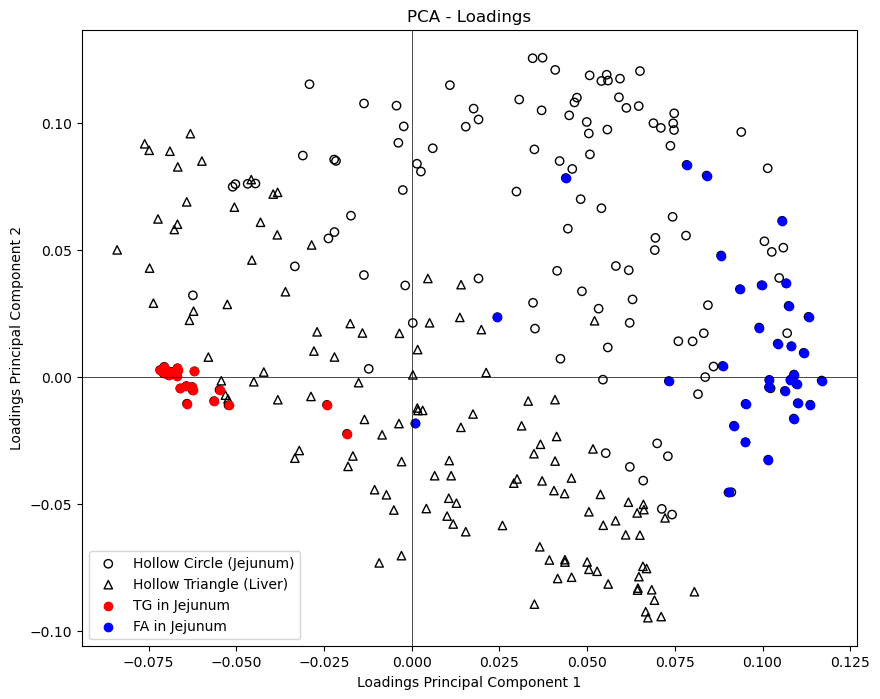

In [10]:

# Plotting loadings in a scatter plot, 
fig, ax = plt.subplots(figsize=(10, 8))


# Creating masks for coloring
mask_FA_Jejunum = (merged_data['family'] == 'FA') & (merged_data['Tissue']== 'Jejunum')
mask_TG_Jejunum = (merged_data['family'] == 'TG') & (merged_data['Tissue']== 'Jejunum')
# Second Mask, 
mask_lipid_Jejunum = (merged_data['Tissue'] == 'Jejunum')
mask_lipid_Liver  = (merged_data['Tissue'] == 'Liver')


# To plot the data I opted to use four scatter plots 



# Scatter plot for hollow circle (Jejunum)
ax.scatter(merged_data.loc[mask_lipid_Jejunum, 'PC1 Loading'],
           merged_data.loc[mask_lipid_Jejunum, 'PC2 Loading'], 
           facecolors='none', 
           edgecolors='black', 
           marker='o', 
           label='Hollow Circle (Jejunum)')

# Scatter plot for hollow triangle (Liver)
ax.scatter(merged_data.loc[mask_lipid_Liver, 'PC1 Loading'], 
           merged_data.loc[mask_lipid_Liver, 'PC2 Loading'], 
           facecolors='none', 
           edgecolors='black', 
           marker='^', 
           label='Hollow Triangle (Liver)')


ax.scatter(merged_data.loc[mask_TG_Jejunum, 'PC1 Loading'], 
           merged_data.loc[mask_TG_Jejunum, 'PC2 Loading'], 
           color='red', 
           label='TG in Jejunum')


ax.scatter(merged_data.loc[mask_FA_Jejunum, 'PC1 Loading'], 
           merged_data.loc[mask_FA_Jejunum, 'PC2 Loading'], 
           color='blue', 
           label='FA in Jejunum')


# Legend and labels
ax.legend(loc = "lower left")
ax.set_title("PCA - Loadings")
ax.set_xlabel('Loadings Principal Component 1')
ax.set_ylabel('Loadings Principal Component 2')

ax.axhline(0, color = 'black', linewidth = .5)
ax.axvline(0, color = 'black', linewidth = .5)
plt.show() 





In [11]:
# Plot 2 

In [12]:
# Merging the tissue and family columns to the signal matrix
merged_data_signal = pd.merge(signal_matrix_t, metadata[['Tissue', 'family']], left_index = True, right_index = True )


In [13]:
merged_data_signal.head()

,Control,Control,Control,Control,Control,Control,i.V. 6h,i.V. 6h,i.V. 6h,i.V. 6h,i.V. 6h,i.V. 6h,i.V. 24h,i.V. 24h,i.V. 24h,i.V. 24h,i.V. 24h,i.V. 24h,i.V. 72h,i.V. 72h,i.V. 72h,i.V. 72h,i.V. 72h,i.V. 72h,i.V. 168h,i.V. 168h,i.V. 168h,i.V. 168h,i.V. 168h,i.V. dd 72h,i.V. dd 72h,i.V. dd 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h,i.P. 72h,Tissue,family
Var_001,3.743703e+06,4.545332e+06,3.142453e+06,3.773138e+06,3.685081e+06,3.421208e+06,3.626866e+06,7.160714e+06,4.263485e+06,4.975085e+06,3.056781e+06,2.844251e+06,4.010110e+06,4.370144e+06,6.977985e+06,5.053243e+06,3.403949e+06,4.508101e+06,4.097717e+06,4.610747e+06,6.028783e+06,3.105624e+06,3.486704e+06,3.809533e+06,5.701423e+06,3.912906e+06,2.706709e+06,4.198743e+06,3.117843e+06,4.517887e+06,4.064940e+06,4.218098e+06,2.472104e+06,3.531767e+06,3.337175e+06,2.864635e+06,4.934104e+06,3.825841e+06,Liver,FA
Var_002,1.249383e+05,1.626511e+05,1.032212e+05,1.049328e+05,1.745033e+05,1.265128e+05,2.210343e+05,9.745539e+05,3.130677e+05,1.974465e+05,1.070470e+05,1.470853e+05,8.228346e+04,1.832399e+05,2.133079e+05,3.036983e+05,1.587629e+05,1.407878e+05,1.858316e+05,9.678004e+04,9.022497e+04,4.211591e+04,7.169816e+04,7.979827e+04,1.278744e+05,9.036887e+04,2.424350e+05,2.519568e+05,1.879661e+05,9.396024e+04,1.143511e+05,8.941774e+04,3.065346e+04,6.832356e+04,6.525957e+04,4.800709e+04,4.555649e+05,7.197276e+04,Liver,FA
Var_003,3.434277e+04,4.044935e+04,2.918241e+04,3.402616e+04,2.916255e+04,2.747502e+04,2.958396e+04,4.059940e+04,3.503198e+04,2.914745e+04,2.474499e+04,2.055545e+04,3.396744e+04,3.641335e+04,4.274934e+04,2.924637e+04,2.702979e+04,2.620927e+04,3.031230e+04,3.134397e+04,4.168336e+04,2.658074e+04,2.866877e+04,2.694130e+04,4.223602e+04,3.421930e+04,3.054461e+04,2.486590e+04,3.675307e+04,3.103228e+04,3.677941e+04,3.090638e+04,2.696247e+04,2.814731e+04,2.364146e+04,2.335866e+04,3.093024e+04,1.986057e+04,Liver,FA
Var_004,3.237222e+06,3.890073e+06,2.627076e+06,2.841866e+06,2.856276e+06,2.418878e+06,2.400269e+06,3.036837e+06,2.421336e+06,2.922647e+06,2.371919e+06,1.861617e+06,3.465931e+06,2.488037e+06,4.571138e+06,2.658675e+06,2.259738e+06,2.858095e+06,2.521199e+06,3.461766e+06,6.056844e+06,3.268054e+06,2.964271e+06,2.335584e+06,4.940885e+06,2.947018e+06,1.860832e+06,3.125605e+06,2.494460e+06,4.052450e+06,2.965811e+06,2.781882e+06,2.943110e+06,2.917898e+06,2.939001e+06,2.884041e+06,2.418744e+06,3.099203e+06,Liver,FA
Var_005,2.276154e+06,2.257932e+06,1.540911e+06,1.662993e+06,2.873556e+06,2.008736e+06,2.196804e+06,1.099393e+07,3.567995e+06,2.884803e+06,1.628468e+06,1.744390e+06,1.355134e+06,2.561608e+06,3.979977e+06,3.764410e+06,2.124658e+06,2.889097e+06,2.066003e+06,2.119648e+06,2.310511e+06,7.823964e+05,1.032880e+06,1.428165e+06,2.667586e+06,1.649858e+06,2.262628e+06,1.851256e+06,1.609044e+06,1.253801e+06,1.383874e+06,1.164111e+06,5.307168e+05,1.077920e+06,1.074806e+06,8.098563e+05,6.065633e+06,1.098639e+06,Liver,FA


In [14]:
# Only Grabbing the samples that correspond to jejunum and PE

mask_Jejunum = (merged_data_signal['family'] == 'etherPE') & (merged_data_signal['Tissue'] == 'Jejunum')


# applying the mask to my dataframe
filtered_data = merged_data_signal[mask_Jejunum]

In [15]:

filtered_data_plotting = filtered_data.drop(['Tissue','family'], axis = 1) # dropping the Tissue and Family Columns so filtered matrix is numerical.
filtered_data_plotting = filtered_data_plotting.T

In [16]:
filtered_data_plotting.head()

,Var_226,Var_227,Var_228,Var_229
Control,365096.032109,339019.995231,1.471187e+06,5.828414e+06
Control,317689.491657,339899.696411,1.146780e+06,4.577774e+06
Control,316820.204380,279932.889291,7.802462e+05,3.341407e+06
Control,343777.119740,289177.881710,1.063486e+06,4.470912e+06
Control,343795.983602,167864.737615,1.408668e+06,5.136637e+06


In [17]:
row_sums_plotting = filtered_data_plotting.sum(axis = 1) # getting the row sums





row_sums_plotting.head() # Sanity Check

Control    8.003717e+06
Control    6.382143e+06
Control    4.718406e+06
Control    6.167352e+06
Control    7.056966e+06
dtype: float64

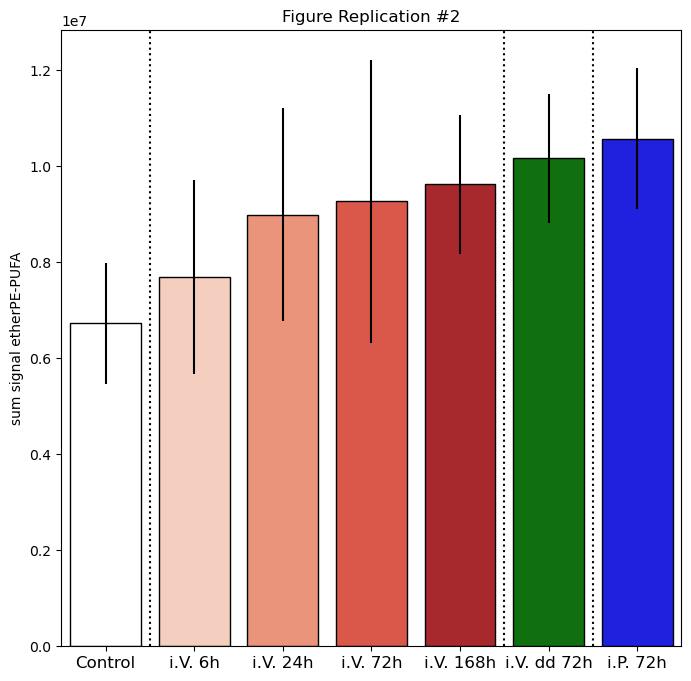

In [18]:




# Calculate the mean and standard deviation for each category
means = row_sums_plotting.groupby(level=0).mean()
stds = row_sums_plotting.groupby(level=0).std()

# Sort the data from least to greatest
sorted_means = means.sort_values()
sorted_stds = stds.loc[sorted_means.index]

# Creating a Custom Color palette for coloring, this sucked and took me way too long but color specificity was important in the the context of the article. 
custom_palette = ["white"] + sns.color_palette("Reds", n_colors=len(sorted_means) - 3) + ["green", "blue"]

plt.figure(figsize=(8, 8))

# putting it all in sns barplot
sns.barplot(x=sorted_means.index, y=sorted_means, palette=custom_palette, edgecolor='black', yerr=sorted_stds, capsize=5)


# adding various labeleing to the graph!!
plt.ylabel('sum signal etherPE-PUFA')
plt.title('Figure Replication #2')

plt.xticks(fontsize=12)

plt.axvline(x=0.5, color='black', linestyle='dotted')  # Between "Control" and "IV 6h"
plt.axvline(x=4.5, color='black', linestyle='dotted')  # Both sides of IV dd 72h
plt.axvline(x=5.5, color='black', linestyle='dotted')

# Showing the plot
plt.show()



